In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 18

@author: yaning
"""

import HH_original.HH_original as HH
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [13]:
importlib.reload(HH)

0


<module 'HH_original.HH_original' from '/home/yaning/Documents/Spiking_NN/HH_original/HH_original.py'>

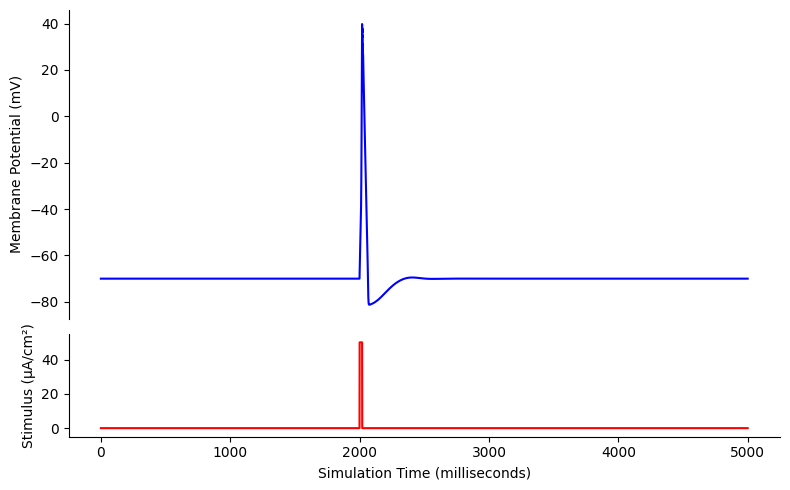

In [29]:
hh = HH.HHModel()
pointCount = 5000
voltages = np.empty(pointCount)
# current = np.empty(pointCount)
# times = np.arange(pointCount) * 0.05
times = np.arange(pointCount)
stim = np.zeros(pointCount)
stim[2000:2020] = 50  # create a square pulse
# stim[2400:3020] = 5

for i in range(len(times)):
    hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
    
    voltages[i] = hh.Vm
    # note: you could also plot hh's n, m, and k (channel open states)
    # current[i] = hh.I
    if voltages[i] == 105.33934647896291:
        max_start = i
    elif voltages[i] == -11.23942848165305:
        min_end = i



f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(times, voltages - 70, 'b')
# ax1.plot(times, current, 'b')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

ax2.plot(times, stim, 'r')
ax2.set_ylabel("Stimulus (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.margins(0, 0.1)
plt.tight_layout()
# plt.savefig("plots/big_input_current.png", dpi= 300)
plt.show()

In [115]:
min(voltages)

np.float64(-11.23942848165305)

In [117]:
max_start

2051

In [118]:
min_end

2105

In [119]:
min_end - max_start

54

In [18]:
firing_times = []
for i in range(pointCount):
    if voltages[i] >= 20:
        firing_times.append(i)

In [ ]:
# 20 time 6.8-7.8
# 50 2.5-3.5

In [9]:
# fire_durations = []
max_voltages = []
# starts_ends = []
pointCount = 5000

for c in np.arange(2.5, 3.5, 0.01):
    hh = HH.HHModel()
        
    voltages = np.empty(pointCount)
    # current = np.empty(pointCount)

    stim = np.zeros(pointCount)
    stim[2000:2050] = c  # create a square pulse
    # stim[2400:3020] = 5

    for i in range(pointCount):
        

        hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
        voltages[i] = hh.Vm
        

        # starts_ends.append([max_start, min_end])
    max_voltages.append(max(voltages))
        # fire_durations.append(min_end-max_start)

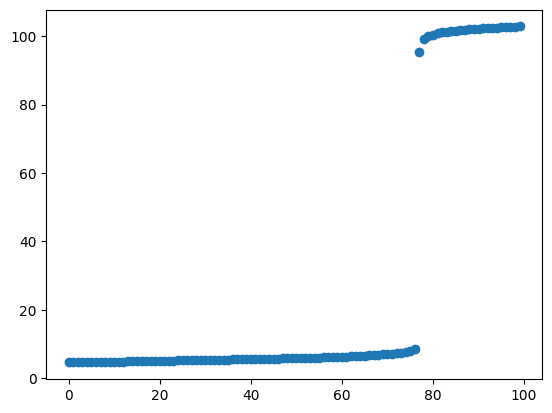

In [11]:
plt.plot(max_voltages, 'o')

In [ ]:
max_voltages = [v-70 for v in max_voltages]

In [ ]:
below_zero = []
for i in max_voltages:
    if i <0:
        below_zero.append(i)

In [ ]:
max(below_zero)

np.float64(-59.74699583858741)

In [ ]:
non_zero = []
for i in fire_durations:
    if i != 0:
        non_zero.append(i)

In [ ]:
max(non_zero)

69

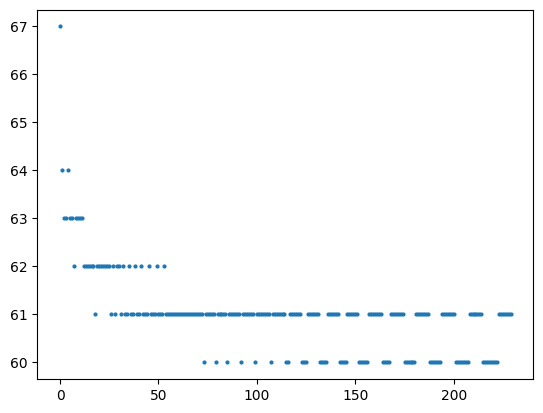

In [ ]:
plt.plot(non_zero, 'o', markersize=2)
plt.savefig("plots/fire_duration_50.png", dpi=300)

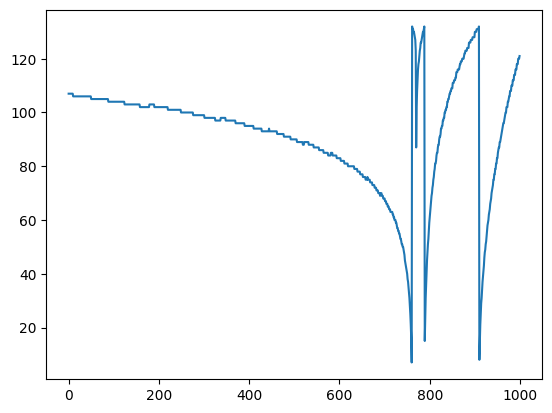

In [74]:
plt.plot(fire_durations)

In [64]:
max_voltages[-1]

np.float64(103.78571410799135)

In [67]:
max_voltages[-1]

np.float64(102.99185224999982)

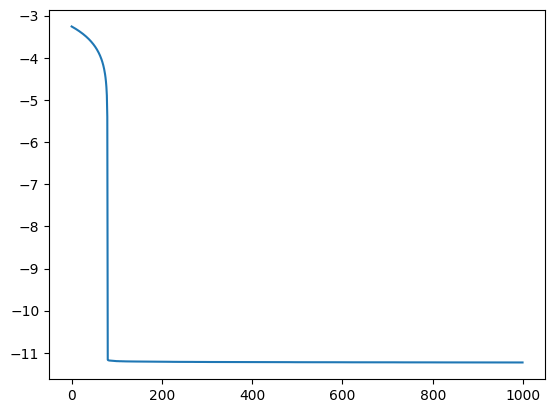

In [60]:
plt.plot(min_voltages)

In [61]:
min(min_voltages)

np.float64(-11.229657388464434)

In [ ]:
# 50 time, 2.5-3.5
min_voltages[-1]

np.float64(-11.222364324973464)

In [33]:
min(min_voltages)

np.float64(-11.222482103072409)